# Importing needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

# Importing Data


In [13]:
#Importing data
pdf2010 = pd.read_excel('./../Data sets/Census 2010.xlsx')

In [14]:
#Info about rows and columns
pdf2010.shape

#Changing the number of rows displayed
pd.set_option('display.max_rows', None)

#displaying first 5 rows
pdf2010.head()

,Unnamed: 0,Social Explorer - Census 2010,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Statistics,"Census Tract 9, Hamilton County, Ohio",NaN,"Census Tract 10, Hamilton County, Ohio",NaN,"Census Tract 16, Hamilton County, Ohio",NaN,"Census Tract 17, Hamilton County, Ohio",NaN,TOTAL (All Selected Census Tracts),NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SE:T1. Total Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total Population,1652,NaN,1437,NaN,1487,NaN,1488,NaN,6064,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data 

In [4]:
#Removing rows with all NaN values 
pdf2010 = pdf2010.dropna(subset=["Unnamed: 0"])
pdf2010 = pdf2010.dropna(subset=["Social Explorer - Census 2010"])

# Replacing NaN by 0s
pdf2010 = pdf2010.fillna(0)

#Dropping first row
pdf2010 = pdf2010.drop([0])

#Showing a list of columns names
list(pdf2010)

['Unnamed: 0',
 'Social Explorer - Census 2010',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10']

In [5]:
#Renaming columns
pdf2010.columns = ['Category',
                   'Census Tract 9, Hamilton County, Ohio',
                   'Census Tract 9, Percentage',
                   'Census Tract 10, Hamilton County, Ohio',
                   'Census Tract 10, Percentage',
                   'Census Tract 16, Hamilton County, Ohio',
                   'Census Tract 16, Percentage',
                   'Census Tract 17, Hamilton County, Ohio',
                   'Census Tract 17, Percentage',
                   'TOTAL (All Selected Census Tracts)',
                   'TOTAL Percentage']

In [6]:
#Removing columns I dont want
for col in pdf2010.columns:
    if 'Percentage' in col:
        del pdf2010[col]
             

In [7]:
#Obtaining index values of all the rows
pdf2010.index.values

#Removing all the rows I don't want
pdf2010 = pdf2010.drop([ 3,   6,   7,   8,  11,  12,  13,  16,  17,  18,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  36,  37,  38,
        48,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
       101, 104, 105, 106, 109, 110, 111, 114, 115, 116, 117])


In [8]:
#Changing the data to floats
pdf2010 = pdf2010.astype({'Census Tract 9, Hamilton County, Ohio': np.float64, 'Census Tract 10, Hamilton County, Ohio':np.float64,
                          'Census Tract 16, Hamilton County, Ohio':np.float64,'Census Tract 17, Hamilton County, Ohio':np.float64,
                          'TOTAL (All Selected Census Tracts)':np.float64})

#Checking if data are floats now
pdf2010.dtypes

Category                                   object
Census Tract 9, Hamilton County, Ohio     float64
Census Tract 10, Hamilton County, Ohio    float64
Census Tract 16, Hamilton County, Ohio    float64
Census Tract 17, Hamilton County, Ohio    float64
TOTAL (All Selected Census Tracts)        float64
dtype: object

In [9]:
pdf2010

,Category,"Census Tract 9, Hamilton County, Ohio","Census Tract 10, Hamilton County, Ohio","Census Tract 16, Hamilton County, Ohio","Census Tract 17, Hamilton County, Ohio",TOTAL (All Selected Census Tracts)
41,Total population:,1652.0,1437.0,1487.0,1488.0,6064.0
42,White alone,539.0,578.0,200.0,201.0,1518.0
43,Black or African American alone,1059.0,791.0,1270.0,1241.0,4361.0
44,American Indian and Alaska Native alone,10.0,3.0,1.0,3.0,17.0
45,Asian alone,12.0,24.0,3.0,7.0,46.0
46,Native Hawaiian and Other Pacific Islander alone,0.0,0.0,0.0,0.0,0.0
47,Some Other Race alone,6.0,8.0,0.0,2.0,16.0


# Creating Visualizations

<AxesSubplot:xlabel='Category'>

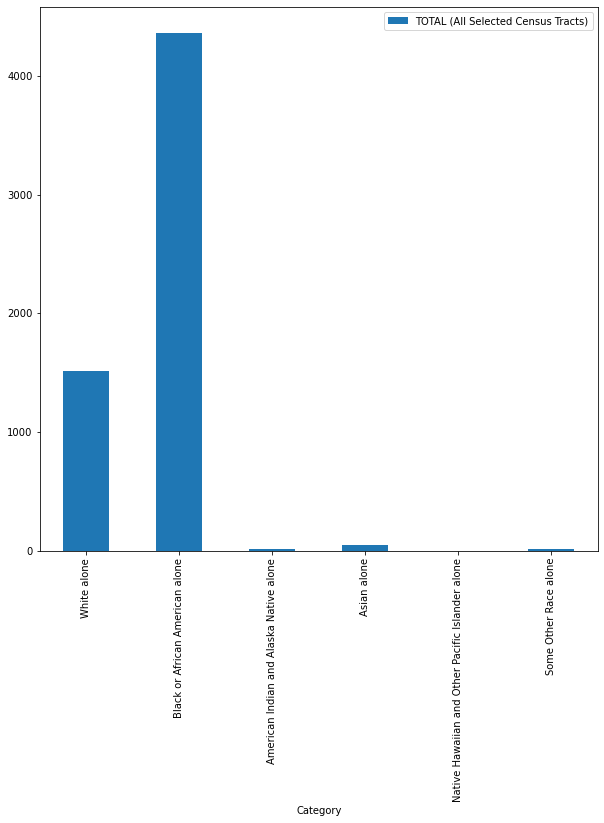

In [10]:
pdf2010.iloc[1:7].plot.bar(x = 'Category', y = 'TOTAL (All Selected Census Tracts)', figsize=(10,10))

In [11]:
pdf2010.to_pickle('pdf2010.pkl')